# Marketing strategy for a new brand line

## Table of contents
<ul><font color=blue>
<li><a href="#problem">Question and problem definition</a></li>
<li><a href="#wrangle">Wrangle, prepare, cleanse the data</a></li>
<li><a href="#analyze">Analyze, identify patterns, and explore the data</a></li>
<li><a href="#model">Model, predict and solve the problem</a></li>
<li><a href="#conclusion">Report and present the problem solving steps and final solution</a></li>
</ul>




<a id='problem'></a>
### Question and problem definition
Our client is a business platform which serves online marketing campaigns for many brands. One of the purposes of these campaigns is to incentivise online purchases of new products.
One of the brands that they work with has a catalogue of products with different prices, but none of them are within the range between 30 and 40 pounds. This particular brand wants to fill the gap in this price range by releasing a new line.
Our mission is to use existing data to evaluate how to best market the new line and predict the sales.
The dataset provided covered the period from 2018, July 1st to August 14th, but has several missing data points we need to provide in order to fit a model which will predict the sales in the following 2-3 weeks 

In [19]:
#This code is to import the libraries we will ptentially be using during the execution of the tasks I have been assigned to
# data analysis and wrangling
import pandas as pd
import pickle
import numpy as np
import random as rnd
from datetime import timedelta
from scipy import stats

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [20]:
#Import of data into a dataframe called df
df=pd.read_pickle('case_study.pickle')
df.head()

,date,avg_hour,min_hour,max_hour,device_name,productBand,avg_price,total_products,num_orders,city,region,County,Country
1,2018-07-12,20.0,20,20,Mobile,between20and30,29.95,1.0,1,Redbourn,Hertfordshire,Hertfordshire,England
2,2018-08-05,22.0,22,22,Desktop and Laptop,between20and30,27.95,1.0,1,Bearsden,East Dunbartonshire,NaN,NaN
3,2018-07-13,14.0,14,14,Mobile,between20and30,27.95,1.0,1,Bearsden,East Dunbartonshire,NaN,NaN
5,2018-08-10,19.0,19,19,Tablet,lessThan10,9.95,1.0,1,Bearsden,East Dunbartonshire,NaN,NaN
6,2018-07-12,17.0,17,17,Desktop and Laptop,between20and30,29.95,1.0,1,Greenwich,Greenwich,NaN,NaN


<a id='wrangle'></a>
### Wrangle, prepare, cleanse the data
In this section we will be exploring the dataset to answer qustions like:
<ul>
<li>Which features are available in the dataset? </li>
<li>Which features are categorical and which ones are numerical?</li>
<li>Which features have missing values and how can we handle them? </li>
<li>which ones can we drop?</li>
    </ul>

In [21]:
#data exploration
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27091 entries, 1 to 32681
Data columns (total 13 columns):
date              27091 non-null object
avg_hour          27091 non-null float64
min_hour          27091 non-null int64
max_hour          27091 non-null int64
device_name       27091 non-null object
productBand       27091 non-null object
avg_price         25853 non-null float64
total_products    25100 non-null float64
num_orders        27091 non-null int64
city              27091 non-null object
region            27091 non-null object
County            10406 non-null object
Country           10406 non-null object
dtypes: float64(3), int64(3), object(7)
memory usage: 2.9+ MB


In [22]:
#converting type "object" to "datetime" for column "date" 
df['date'] = df['date'].astype('datetime64')
df.info()
#Sorting the values by 'date'
df.sort_values(by='date', inplace=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27091 entries, 1 to 32681
Data columns (total 13 columns):
date              27091 non-null datetime64[ns]
avg_hour          27091 non-null float64
min_hour          27091 non-null int64
max_hour          27091 non-null int64
device_name       27091 non-null object
productBand       27091 non-null object
avg_price         25853 non-null float64
total_products    25100 non-null float64
num_orders        27091 non-null int64
city              27091 non-null object
region            27091 non-null object
County            10406 non-null object
Country           10406 non-null object
dtypes: datetime64[ns](1), float64(3), int64(3), object(6)
memory usage: 2.9+ MB


In [23]:
#The dataset contains a total of 27091 entries. Features "County" and "Country" may be droppped form the dataset since
#1.more than 50% of the rows entries are missing 
#2.they may not contribute to determine the sales
df=df.drop(['County', 'Country'], axis=1)

In [24]:
#creating 2 separated lists for numeric and categorical features
categorical_features = [f for f in df.columns if df.dtypes[f] == 'object']
numberical_features = [f for f in df.columns if df.dtypes[f] != 'object']


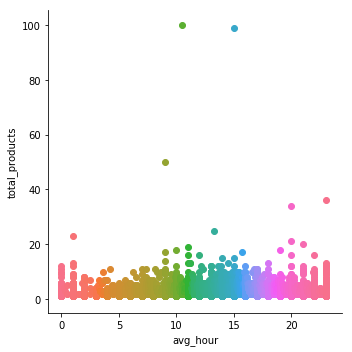

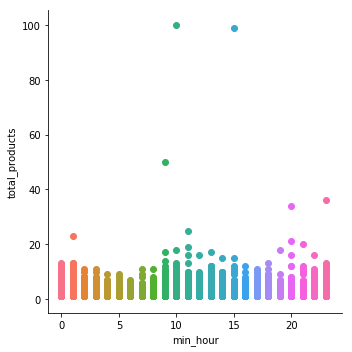

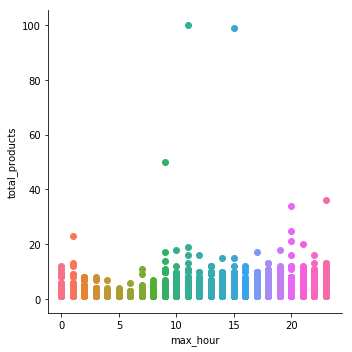

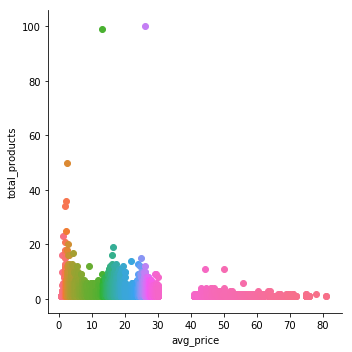

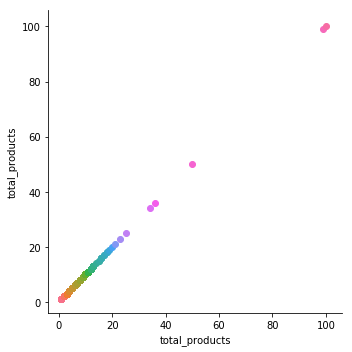

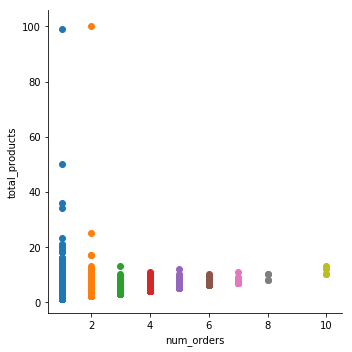

In [25]:
# Scatter plot for numeric features vs "total_products"
#numberical_features.remove("total_products")
numberical_features.remove("date")
for i in numberical_features:
    sns.FacetGrid(df, hue=i, size=5).map(plt.scatter, i, "total_products") 
plt.show()

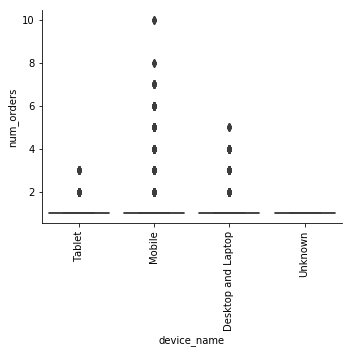

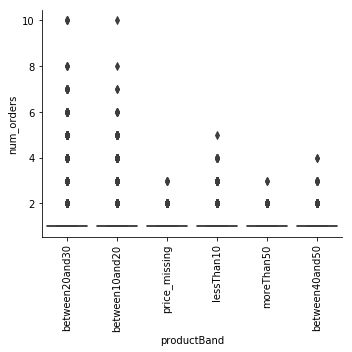

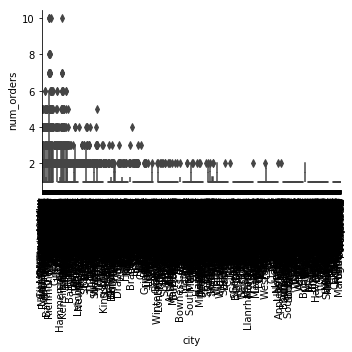

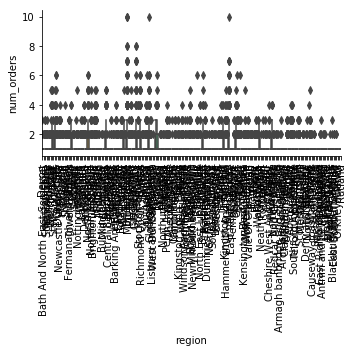

In [26]:
# Boxplot for categorical features vs House sale price
def boxplot(x, y, **kwargs):
    sns.boxplot(x=x, y=y)
    x=plt.xticks(rotation=90)

for i in categorical_features:
    sns.FacetGrid(df, size=5).map(boxplot,i, "num_orders")
plt.show()

In [27]:
#Describing statistical metrics of numerical features
df.describe()

,avg_hour,min_hour,max_hour,avg_price,total_products,num_orders
count,27091.000000,27091.000000,27091.000000,25853.000000,25100.000000,27091.000000
mean,14.739289,14.271825,15.185523,23.428529,1.522749,1.162305
std,5.902051,6.239115,5.995783,13.437024,1.568191,0.550155
min,0.000000,0.000000,0.000000,0.750000,1.000000,1.000000
25%,11.000000,11.000000,12.000000,16.750000,1.000000,1.000000
50%,15.000000,15.000000,16.000000,21.950000,1.000000,1.000000
75%,20.000000,19.000000,20.000000,27.950000,2.000000,1.000000
max,23.000000,23.000000,23.000000,80.950000,100.000000,10.000000


<a id='analyze'></a>
### Analyze, identify patterns, and explore the data
In this session I will be looking much deeper into data trends, exploring their statistical distribution and eventually correcting outliers and nans

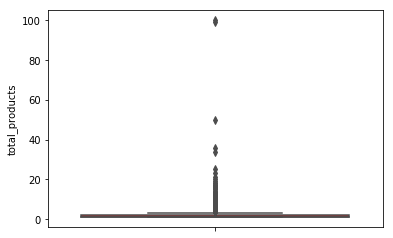

In [33]:
#Features "avg_price" and "total_products" are missing roughly 2000 data points. Let's give a closer look to these 2 features
#Checking frequency distribution for 'total_product'

sns.boxplot(x=df['total_products'], orient='v',color='r')

In [34]:
#The box plot shows presence of outliers. To isolate and remove the outliers using the interquartile range (IQR):
Q1 =  df.total_products.quantile(0.25)
Q3 =  df.total_products.quantile(0.75)
IQR = Q3 - Q1
df =  df[~(( df.total_products < (Q1 - 1.5 * IQR)) |( df.total_products > (Q3 + 1.5 * IQR)))]
df.describe()

,avg_hour,min_hour,max_hour,avg_price,total_products,num_orders
count,25737.000000,25737.000000,25737.000000,24501.000000,23746.000000,25737.000000
mean,14.766869,14.430431,15.093601,23.897686,1.281184,1.106073
std,5.923192,6.161134,5.988674,13.458082,0.556647,0.369746
min,0.000000,0.000000,0.000000,0.750000,1.000000,1.000000
25%,11.000000,11.000000,12.000000,16.950000,1.000000,1.000000
50%,15.000000,15.000000,16.000000,22.950000,1.000000,1.000000
75%,20.000000,20.000000,20.000000,28.950000,1.000000,1.000000
max,23.000000,23.000000,23.000000,80.950000,3.000000,10.000000


I dropped roughly 1300 data points that is about 5% of the total. While I might loose some specific  patterns I still preserve the main trend.

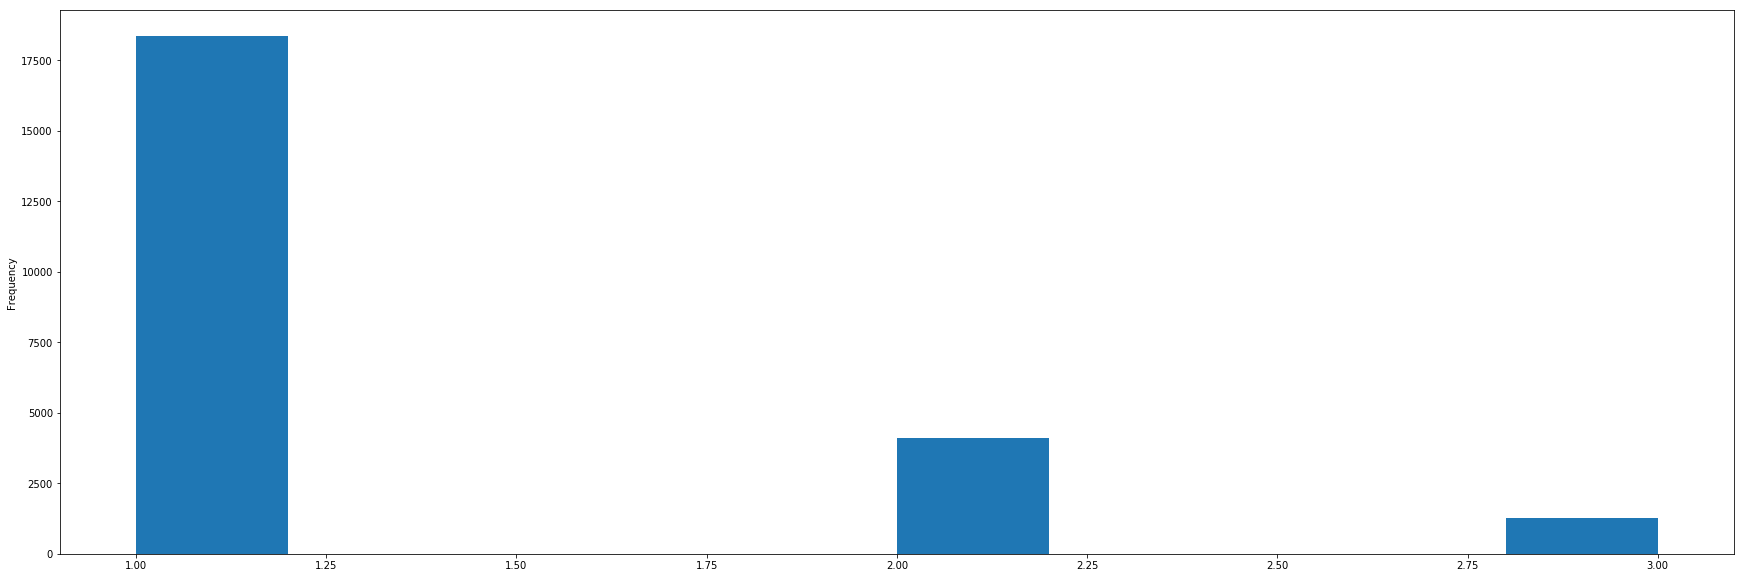

In [35]:
#Checking distribution of 'total_products'
df['total_products'].plot.hist(figsize=(30,10), bins=10)

In [36]:
#Since the data from 'total_products' don't look to follow a normal distribution I decide to impute the 
#median (which is also the most common value of the total products sold each session) in the missing da-
#ta points
df['total_products']=df['total_products'].dropna().fillna(df['total_products'].median())
df.describe()


,avg_hour,min_hour,max_hour,avg_price,total_products,num_orders
count,25737.000000,25737.000000,25737.000000,24501.000000,23746.000000,25737.000000
mean,14.766869,14.430431,15.093601,23.897686,1.281184,1.106073
std,5.923192,6.161134,5.988674,13.458082,0.556647,0.369746
min,0.000000,0.000000,0.000000,0.750000,1.000000,1.000000
25%,11.000000,11.000000,12.000000,16.950000,1.000000,1.000000
50%,15.000000,15.000000,16.000000,22.950000,1.000000,1.000000
75%,20.000000,20.000000,20.000000,28.950000,1.000000,1.000000
max,23.000000,23.000000,23.000000,80.950000,3.000000,10.000000


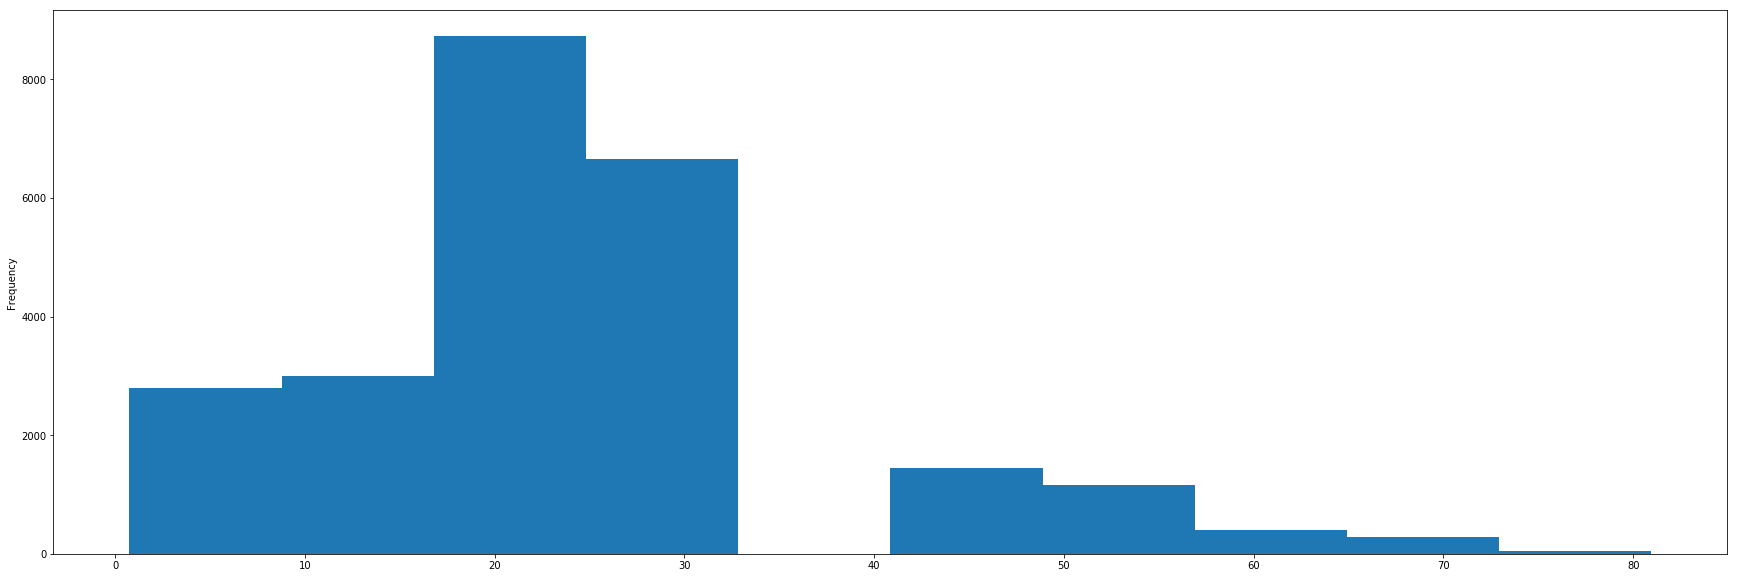

In [13]:
#Checking frequency distribution for average price
df['avg_price'].plot.hist(figsize=(30,10), bins=10)

In [14]:
#since the data from 'avg_price'looks to follow a normal distribution I will impute mean values for 
#missing datapoints
Beamly_df['avg_price']=Beamly_df['avg_price'].fillna(Beamly_df['avg_price'].mean())
Beamly_df.describe()

,avg_hour,min_hour,max_hour,avg_price,total_products,num_orders
count,25737.000000,25737.000000,25737.000000,25737.000000,25737.000000,25737.000000
mean,14.766869,14.430431,15.093601,23.897686,1.259432,1.106073
std,5.923192,6.161134,5.988674,13.130936,0.539934,0.369746
min,0.000000,0.000000,0.000000,0.750000,1.000000,1.000000
25%,11.000000,11.000000,12.000000,17.450000,1.000000,1.000000
50%,15.000000,15.000000,16.000000,22.950000,1.000000,1.000000
75%,20.000000,20.000000,20.000000,27.950000,1.000000,1.000000
max,23.000000,23.000000,23.000000,80.950000,3.000000,10.000000


In [15]:
#Let's give a look to the time-window  from August 8th to August 14th
df.loc[(df['date'] >= '2018-08-08') & (df['date'] <= '2018-08-14')]

,date,avg_hour,min_hour,max_hour,device_name,productBand,avg_price,total_products,num_orders,city,region
23228,2018-08-08,13.000000,13,13,Mobile,between40and50,42.950000,1.0,1,Oswestry,Shropshire
3016,2018-08-08,15.000000,15,15,Tablet,moreThan50,70.990000,1.0,1,Norwich,Norfolk
3047,2018-08-08,20.000000,20,20,Tablet,between20and30,24.950000,1.0,1,Norwich,Norfolk
31333,2018-08-08,19.000000,19,19,Desktop and Laptop,between10and20,19.950000,1.0,1,Barcombe,East Sussex
12697,2018-08-08,16.000000,16,16,Mobile,between10and20,19.950000,1.0,1,Reading,Reading
1034,2018-08-08,5.500000,0,11,Mobile,lessThan10,1.970000,1.0,2,Glasgow,Glasgow City
21136,2018-08-08,16.000000,16,16,Mobile,between20and30,22.950000,1.0,1,Maidenhead,Windsor And Maidenhead
21313,2018-08-08,13.000000,13,13,Mobile,lessThan10,2.970000,1.0,1,Taunton,Somerset
12653,2018-08-08,16.000000,16,16,Mobile,between20and30,22.950000,1.0,1,Reading,Reading
29016,2018-08-08,0.000000,0,0,Mobile,moreThan50,65.950000,1.0,1,Newry,Newry mourne and down


In [16]:
#I noticed 2018-08-14 have a weird trend compare to the other days (avg_hour,min_hour, max_hour are all 
#equal to 0 and the numbers of rows(=sales) is also lower than the other previous days). I decide to 
#not consider data coming from this date
 df= df[ df['date'] != '2018-08-14']

In [17]:
#describing statistical distribution of categorical features
df.describe(include=['O'])

,device_name,productBand,city,region
count,25733,25733,25733,25733
unique,4,6,3274,217
top,Mobile,between20and30,Birmingham,Essex
freq,14618,10609,261,624


In [18]:
#let's check the categories of 'productBand'...
df['productBand'].unique()

array(['between20and30', 'between10and20', 'price_missing', 'lessThan10',
       'moreThan50', 'between40and50'], dtype=object)

In [19]:
#...and convert them in numerical ordinal ones
df['productBand'] = df['productBand'].map( {'price_missing': 0, 'lessThan10': 1, 'between10and20': 2, 'between20and30': 3, 'between40and50': 4, 'moreThan50': 5} ).astype(int)

In [20]:
#let's check the categories of 'device_name'
df['device_name'].unique()


array(['Tablet', 'Mobile', 'Desktop and Laptop', 'Unknown'], dtype=object)

In [21]:
#one device_name category is "Unknown". Let's check how many entries are present for each device_name
df.groupby(['device_name']).count()


,date,avg_hour,min_hour,max_hour,productBand,avg_price,total_products,num_orders,city,region
device_name,,,,,,,,,,
Desktop and Laptop,7005,7005,7005,7005,7005,7005,7005,7005,7005,7005
Mobile,14618,14618,14618,14618,14618,14618,14618,14618,14618,14618
Tablet,3991,3991,3991,3991,3991,3991,3991,3991,3991,3991
Unknown,119,119,119,119,119,119,119,119,119,119


In [22]:
#I decided to not consider the "Unknown" category for our analysis, since it has only 119 entries
 df= df[ df['device_name'] != 'Unknown']
 df['device_name']= df['device_name'].map({'Mobile':0, 'Tablet':1,'Desktop and Laptop':2})

In [23]:
#I drop the features 'city' and 'region', since they won't be used for the modelling stage
df.drop(['city', 'region'], axis=1, inplace=True)

In [24]:
#I assume the frequency of sales depends on the day of the week. Therefore I will create a new variable ('day_of_week')
#for the day of the week 
df['day_of_week']=df['date'].dt.dayofweek

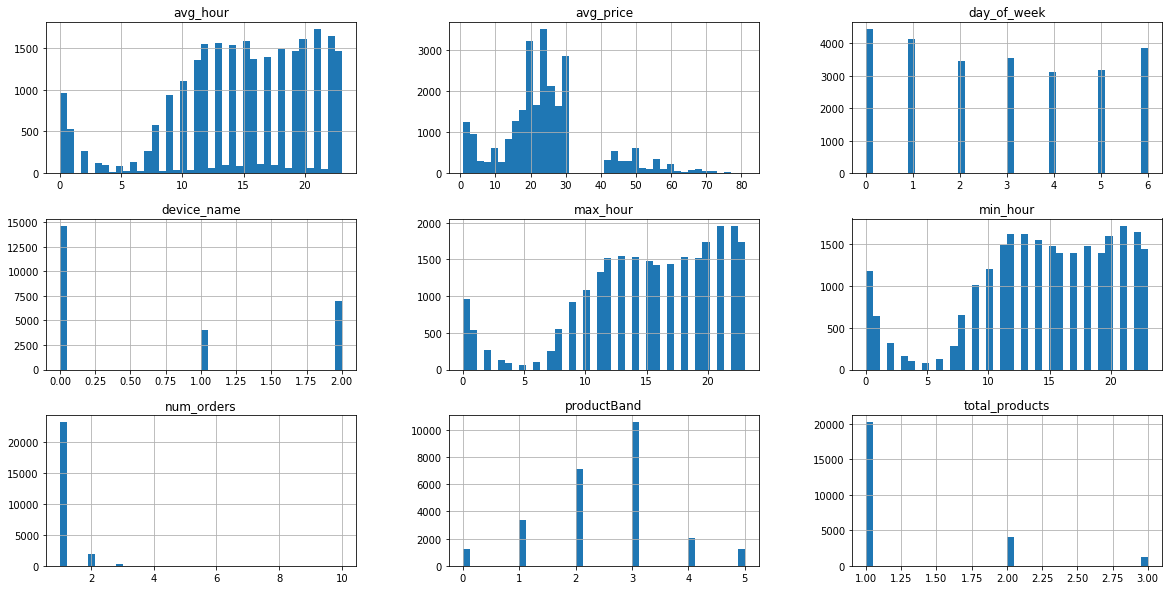

In [25]:
#Let's give a look how data distributions look like after the cleaning stage
df.hist(bins = 40, figsize = (20, 10));

<a id='model'></a>
### Model, predict and solve the problem
Now I will focus on answering the questions for this challenge through use of machine learning tools.
In this section I will:
<ol type="1">
<li>Build a predictive model for the sales from August 14th to August 31st</li>
<li>Simulate the sales after introducing the new brand line which has price range between 30 and 40s pound</li>
<li>Predict future sales using the new line of price ranges</li>
    </ol>
 

1.Build a predictive model for the sales from August 14th to August 31st

Text(0,0.5,'Daily sales')

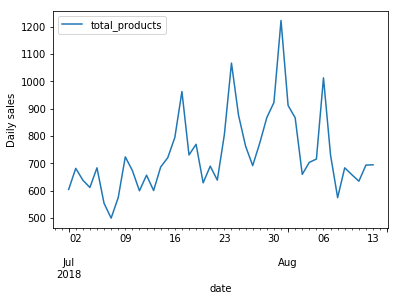

In [26]:
#Let's give a look how the time-serie of daily sales looks like
daily_trend=pd.DataFrame(df.groupby(['date']).agg({'total_products':'sum'}))
daily_trend.plot()
plt.ylabel("Daily sales")


In [27]:
#I will train Prophet machine learning algorithm on sales data
from fbprophet import Prophet
data_prophet = daily_trend.copy()
data_prophet = pd.DataFrame(data_prophet)
data_prophet.reset_index(drop=False, inplace=True)
data_prophet.columns =['ds','y']
data_prophet

,ds,y
0,2018-07-01,605.0
1,2018-07-02,682.0
2,2018-07-03,639.0
3,2018-07-04,612.0
4,2018-07-05,684.0
5,2018-07-06,554.0
6,2018-07-07,500.0
7,2018-07-08,575.0
8,2018-07-09,724.0
9,2018-07-10,674.0


INFO:fbprophet.forecaster:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\Valentina\Anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


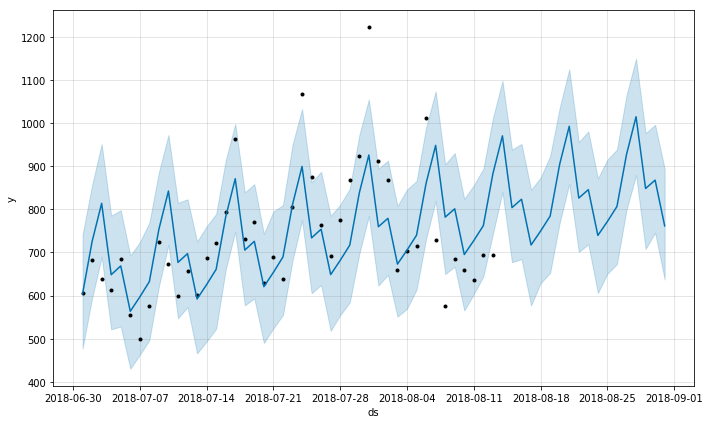

In [31]:
#Using trained Prophet model to predict the fututre 18 days
m = Prophet()
m.fit(data_prophet)
future = m.make_future_dataframe(periods=18, freq='D')
forecast = m.predict(future)
m.plot(forecast)
plt.savefig('forecast.png', bbox_inches='tight')
plt.show()

#daily_trend.plot()

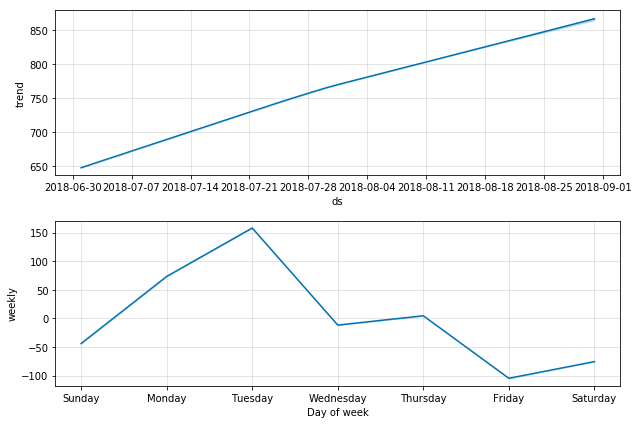

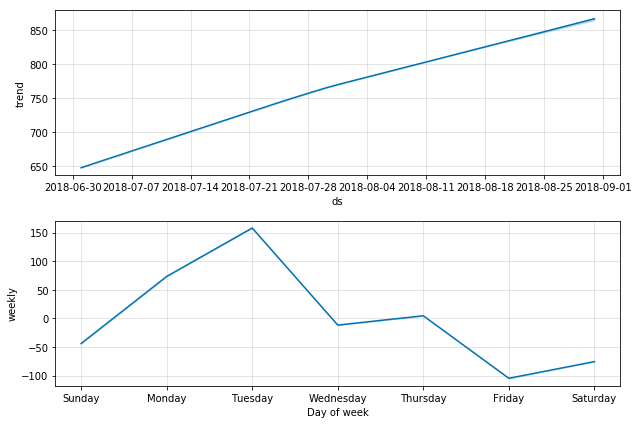

In [792]:
#let's visualize the trends of the sales
m.plot_components(forecast)

There is a clear trend of growth for the sales with time. On a weekly base, Tuesday is the day with more sales. After Tuesday, sales drop and reach a minimum on Friday

In [793]:
forecast.columns

Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'weekly', 'weekly_lower', 'weekly_upper', 'multiplicative_terms',
       'multiplicative_terms_lower', 'multiplicative_terms_upper', 'yhat'],
      dtype='object')

In [794]:
#now let's see the values for the future 18 days
forecasted_values = forecast[['ds', 'yhat']].tail(18)
forecasted_values = forecasted_values.set_index('ds')
forecasted_values.columns = ['y']
forecasted_values

,y
ds,
2018-08-14,970.558856
2018-08-15,804.064699
2018-08-16,823.514941
2018-08-17,717.389256
2018-08-18,749.754899
2018-08-19,784.486533
2018-08-20,904.927150
2018-08-21,992.724970
2018-08-22,826.230813


In [795]:
#calculating total of sales
sum(forecasted_values['y'])

15157.412127970292

2.Simulate the sales after introducing the new brand line which has price range between 30 and 40s pound

In [796]:
#Our final goal is to see if the new brand line is going to be beneficial for the sales
#let's calculate how many products the client has sold in the time window of the given dataset and without
#using the new bran line
sum(df['total_products'])


32269.0

In [797]:
#And let's calculate the revenue for the same as above
Total_revenue=df.total_products*df.avg_price
sum(Total_revenue)

740343.2900042145

In [808]:
#Now I want to build a predictive model for the sales, based on the dataset features.
#I decided to split some redundant features like 'productBand'(we already have 'avg_price',
#'min_hour'and 'max_hour'(we have 'avg_hour', that has a similar distrobution as shown by histogram plots).
#I will split the time-series between training and testing dataset in a ratio 2:1. The model will be
#therefore trained on the a period of 1 month..

df_train =  df.loc[( df['date'] >= '2018-07-01')|( df['date']<= '2018-07-31')]
Y_train =  df_train['total_products']
X_train =  df_train.drop(['total_products', 'date','productBand','min_hour','max_hour'], axis=1)  

In [809]:
#and test on the following 14 days
 df_test =  df.loc[( df['date'] >= '2018-08-01')|( df['date']< '2018-08-14')]
Y_test =  df_test['total_products']
X_test =  df_test.drop(['total_products', 'date','productBand','min_hour','max_hour'], axis=1)

In [810]:
df_train.groupby('total_products').sum()

,avg_hour,min_hour,max_hour,device_name,productBand,avg_price,num_orders,day_of_week
total_products,,,,,,,,
1.0,300144.236039,298867,301341,13871,51485,506855.719148,20653,57970
2.0,60030.000000,55490,64570,3221,9651,83589.938194,5464,11438
3.0,18071.666667,15230,20744,909,2702,22102.564823,2227,3460


In [819]:
#Let's evaluate which machine learning algorythm is more accurate using R2 as metric
from sklearn.metrics import r2_score

models = []
models.append(('KNN', KNeighborsClassifier()))
models.append(('RT', DecisionTreeClassifier()))
models.append(('DF', RandomForestClassifier()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('CRT', DecisionTreeRegressor()))
models.append(('RDF', RandomForestRegressor()))
models.append(('LNR', LinearRegression()))
models.append(('RID', Ridge()))
models.append(('LAR', Lasso()))


In [820]:
# evaluate each model in turn
results = []
names = []
for name, model in models:
    
    model.fit(X_train,Y_train)
    Y_pred = model.predict(X_test)
    r2 = r2_score(Y_test, Y_pred)
     
    results.append(r2)
   
    names.append(name)
    msg = "%s: %f" % (name, r2.mean())
   
    print(msg)

KNN: 0.118705
RT: 0.761227
DF: 0.707216
LDA: -0.013515
CRT: 0.846721
RDF: 0.777540
LNR: 0.279781
RID: 0.279781
LAR: 0.009891


In [821]:
#Decision Tree algorithm is giving the best accuracy. Let's create the regressor for it and call it DTR
DTR = DecisionTreeRegressor(random_state = 46)
DTR.fit(X_train, Y_train);
print(DTR.score(X_test, Y_test))

0.8467213137512204


In [822]:
#I am checking the lenght of the dataframe before creating a new range of average prices 
df.shape

(25614, 10)

In [823]:
#I am now creatin a new columns for new average prices of products. This serie of value will have a 
#normal distribution based on the mean and standard deviation of the existing 'avg_price' data
df['avg_price_random_30to40'] =np.random.normal(23.428529 ,13.437024, 25614)

In [824]:
#Let's check how the new dataframe looks like
df.describe()

,avg_hour,min_hour,max_hour,device_name,productBand,avg_price,total_products,num_orders,day_of_week,avg_price_random_30to40
count,25614.000000,25614.000000,25614.000000,25614.000000,25614.000000,25614.000000,25614.000000,25614.000000,25614.00000,25614.000000
mean,14.767155,14.429101,15.095456,0.702780,2.492309,23.914587,1.259819,1.106582,2.84485,23.480422
std,5.921944,6.161027,5.987694,0.869412,1.122421,13.139455,0.540403,0.370559,2.06583,13.358261
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.750000,1.000000,1.000000,0.00000,-33.736178
25%,11.000000,11.000000,12.000000,0.000000,2.000000,17.450000,1.000000,1.000000,1.00000,14.504818
50%,15.000000,15.000000,16.000000,0.000000,3.000000,22.950000,1.000000,1.000000,3.00000,23.654254
75%,20.000000,20.000000,20.000000,2.000000,3.000000,27.950000,1.000000,1.000000,5.00000,32.514365
max,23.000000,23.000000,23.000000,2.000000,5.000000,80.950000,3.000000,10.000000,6.00000,82.518154


In [825]:
#The 'avg_price_random_30to40' feature look to have negative values, which I am going to replace with 
#the mean for this feature
avg_positive=[]
for i in df['avg_price_random_30to40']:
    if i >0:
           avg_positive.append(i)
    else:
           avg_positive.append(df['avg_price_random_30to40'].mean())
#replacing the vg_price_random_30to40' column with the new values                             
df['avg_price_random_30to40']=avg_positive

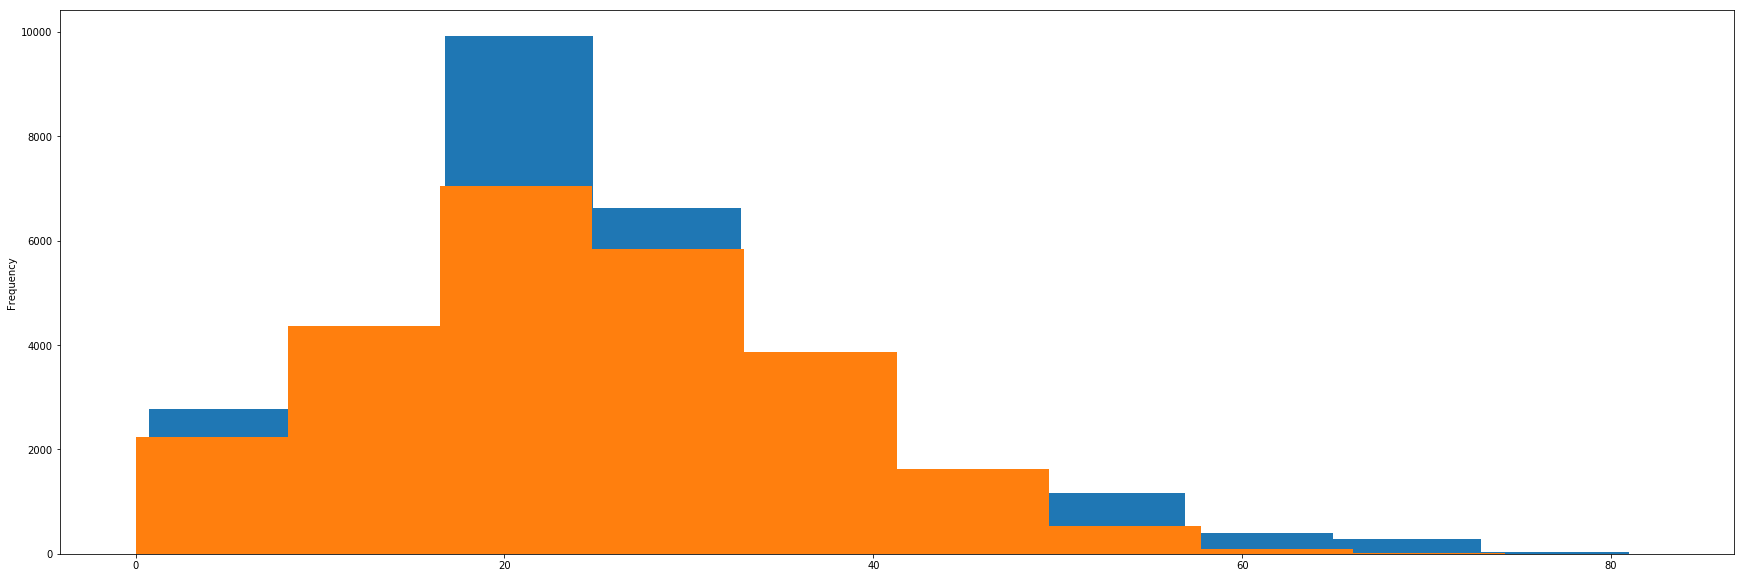

In [826]:
#let's compare the 2 distribution of average prices of products
df['avg_price'].plot.hist(figsize=(30,10), bins=10)
df['avg_price_random_30to40'].plot.hist(figsize=(30,10), bins=10)

In [827]:
#I will now replace 'avg_price'column with the new set of price range
df['avg_price']=df['avg_price_random_30to40']

In [833]:
#and I will predict the sales for this new line using the previously built and trained regressor 'DTR'
X_newline = df.drop(['total_products', 'date', 'avg_price_random_30to40','productBand','min_hour','max_hour'], axis=1)
Y_pred_newline = DTR.predict(X_newline) 
    

In [834]:
#let's calculate the total sales for this new brand line
sum(Y_pred_newline)

41041.92510447073

In [835]:
#and also the revenue
Total_revenue=Y_pred_newline*df.avg_price
sum(Total_revenue)

949479.5254833746

In [837]:
#let's check which device is more used for the sales
df.groupby('device_name').agg({'avg_price':'mean', 'total_products':'sum'})

,avg_price,total_products
device_name,,
0,24.680463,18280.0
1,24.518523,4938.0
2,24.681977,9051.0


Both sales and revenue have been increased by the introduction of the new brand line:
Total sales: from 32269 to ~40000 pounds;
Total revenue: from 740343 to ~900000 pounds

3.Predict future sales using the new line of price ranges

In [838]:
#let's add the new predicted total sales to the initial dataframe in a column named 'total_products_new_line'
df['total_products_new_line']=Y_pred_newline
Y_pred_newline

array([1., 2., 1., ..., 2., 2., 3.])

In [839]:
daily_trend_new_line=pd.DataFrame(df.groupby(['date']).agg({'total_products_new_line':'sum'}))
daily_trend_new_line

,total_products_new_line
date,
2018-07-01,762.361111
2018-07-02,866.835714
2018-07-03,809.038034
2018-07-04,766.346825
2018-07-05,880.483333
2018-07-06,701.666667
2018-07-07,609.433333
2018-07-08,712.166667
2018-07-09,876.241270


In [840]:
#I will train Prophet machine learning algorythm on the new dataset
data_prophet_new = daily_trend_new_line.copy()
data_prophet_new = pd.DataFrame(data_prophet_new)
data_prophet_new.reset_index(drop=False, inplace=True)
data_prophet_new.columns =['ds','y']
data_prophet_new.sum()

y    41041.925104
dtype: float64

INFO:fbprophet.forecaster:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\Valentina\Anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


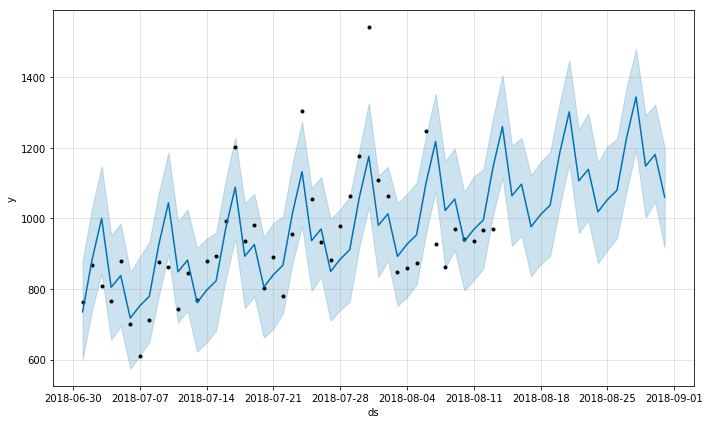

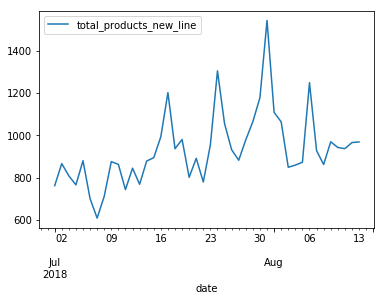

In [841]:
#Using trained Prophet model to predict the future 18 days
m = Prophet()
m.fit(data_prophet_new)
future = m.make_future_dataframe(periods=18, freq='D')
forecast_new = m.predict(future)
m.plot(forecast_new)
daily_trend_new_line.plot()

In [842]:
#now let's see the values for the future 18 days
forecasted_values_new = forecast_new[['ds', 'yhat']].tail(18)
forecasted_values_new = forecasted_values_new.set_index('ds')
forecasted_values_new.columns = ['y']
forecasted_values_new

,y
ds,
2018-08-14,1260.244019
2018-08-15,1064.393451
2018-08-16,1097.220051
2018-08-17,976.500968
2018-08-18,1011.095279
2018-08-19,1037.787426
2018-08-20,1185.468335
2018-08-21,1302.255618
2018-08-22,1106.405050


In [843]:
#calculating total of sales
sum(forecasted_values_new['y'])

20293.951534984877

<a id='conclusion'></a>
### Report and present the problem solving steps and final solution
In this challenge I was able to use a dataset containing informations relative to sales from 2018-07-01 to 2018-08-13 to :
<ol type="1">
<li>Correct and impute missing values based on their statistical distribution</li>
<li>Build a model to predict the sales for the following time window of 18 days (from 2018-08-14 to 2018-08-31)</li>
<li>Simulate the sales upon introduction of a new brand line which was covering a range of average price between 30 and 40 pounds, previously missing from the dataset</li>
<li>Evaluate the benefits of the introduction of the new line on sales and revenue</li>
<li>Isolate the best platform for marketing the new brand line</li>
<li>Predict the future sales upon marketing of the new brand line, evaluating the benefits on the overall sales </li>
</ol>

1.Correct and impute missing values based on their statistical distribution
The main significant changes I brought to the dataset were:
<ul>
<li>dropping sales of products that were judged as outliers with interquartile range metric. This made me drop a good 5% of data points, but probably significantly improve the model</li>
<li>replacing missing values for sales and average price based on their statistical distribution</li>
<li>dropping partial data relative to a date (2018-08-14)</li>
<li>introducing a new feature based on the day of the week data were recorded for </li>
</ul>



2.Build a model to predict the sales for the following time window of 18 days (from 2018-08-14 to 2018-08-31)

I used Prophet, a forecasting open source tool from Facebook, to predict the future sales.

Unfortunately the provided dataset covers a time window that is too short to correct for seasonality or other trends.
Despite that, I was able to predict sales, identify a trend of overall growth during time with maximal sales frequency on Tuesday and to evaluate the total revenue.

Other algorithms should also be tested, such as Autoregressive Integrated Moving average (ARIMA)

3.Simulate the sales upon introduction of a new brand line which was covering a range of average price between 30 and 40 pounds, previously missing from the dataset

I created a new average price feature comprehensive of the price range 30-40 pounds, by assuming a normal distribution with mean and standard deviation equal to those of the pre-existing 'avg_price' feature.
Some of the new average prices were negative so I replaced them with the mean of the distribution.
This approach is stochastic, so it might not predicted as precisely as I am assuming


4.Evaluate the benefits of the introduction of the new line of products on sales and revenue

Using DecisionTreeRegressor I was able to estimate total sales and total revenue for previous price range and compared them with those coming from the introduction of the new price-range line. The new line produces an increase in sales of about 25% (from ~32 to 40 thousands) which corrisponds to an increase of the revenue of about 200000 pounds



5.Isolate the best platform for marketing the new brand line

Both visualization and analysis of data trends showed that the majority of the sales are operated on mobiles, followed by laptops and lastly by tablets.
Therefore, the best 2 platforms to market the new line will be mobiles and laptops

6.Predict the future sales upon marketing of the new brand line, evaluating the benefits in term of sales and revenue

Training Prophet with the predicted new sales data, allowed me to predict what is going to happen to the sales after introducing the new line for the time-window from August 14th to August 31st.
Again introduction of the new price range products improved the total sales of about 25-30%. 

Therefore introduction of the new price range of products looks to be beneficial in terms of sales and revenue and could be further pushed by focusing the marketing on mobiles and laptops devices.